In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.metrics import confusion_matrix

In [3]:
data_frame = pd.read_csv('/content/drive/My Drive/RESEARCH/Ovarian_Cancer_MDPI/ovariantotal.csv')
data_frame.head

<bound method NDFrame.head of        AFP     AG  Age   ALB  ALP  ALT  AST  BASO#  BASO%   BUN  ...   PCT  \
0     3.58  19.36   47  45.4   56   11   24   0.01   0.30  5.35  ...  0.09   
1    34.24  23.98   61  39.9   95    9   13   0.02   0.30  3.21  ...  0.30   
2     1.50  18.40   39  45.4   77    9   18   0.03   0.60  3.80  ...  0.13   
3     2.75  16.60   45  39.2   26   16   17   0.05   0.74  5.27  ...  0.25   
4     2.36  19.97   45  35.0   47   21   27   0.01   0.10  4.89  ...  0.28   
..     ...    ...  ...   ...  ...  ...  ...    ...    ...   ...  ...   ...   
344   2.09  20.91   52  48.6   65   40   30   0.00   0.00  4.29  ...  0.22   
345   2.00  12.14   37  46.1   49    9   20   0.00   0.00  3.12  ...  0.31   
346   2.83  19.23   59  45.8   83    9   16   0.02   0.60  4.38  ...  0.21   
347   1.84  27.22   30  47.8   64   26   22   0.03   0.30  3.61  ...  0.42   
348   1.61  13.00   39  44.9   68    7   13   0.01   0.20  4.38  ...  0.23   

      PDW  PHOS  PLT   RBC   RDW 

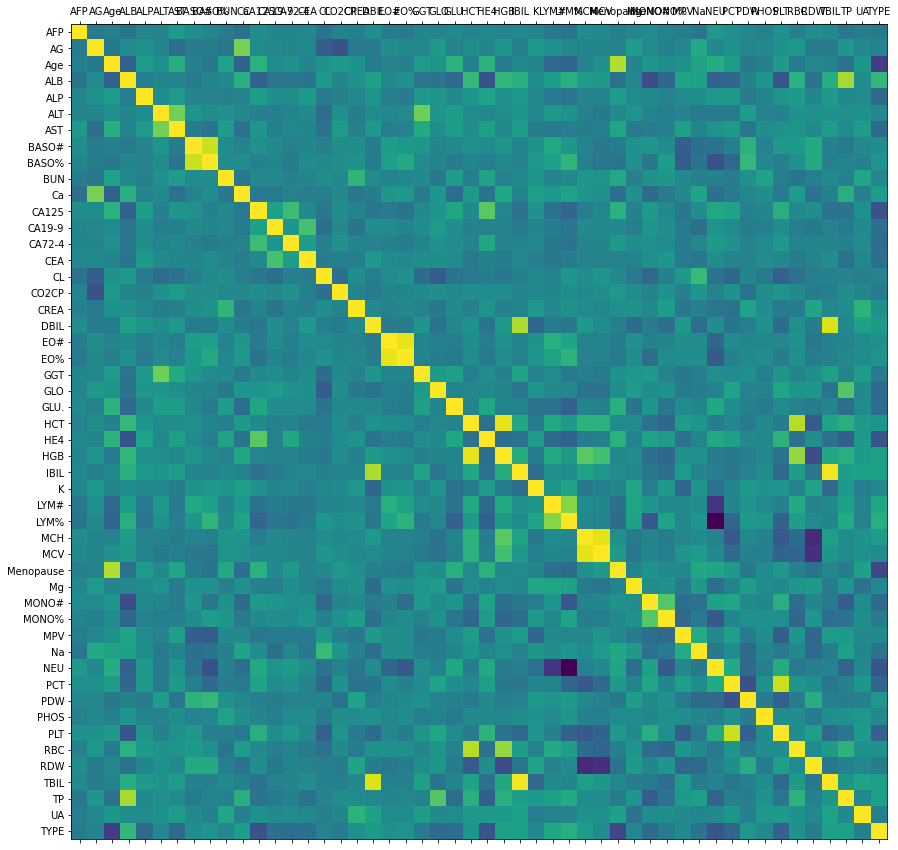

81.38% in training set
20.63% in test set


In [4]:
from sklearn.model_selection import train_test_split

def corr_heatmap(data_frame, size=11):
  correlation = data_frame.corr()
  fig, heatmap = plt.subplots(figsize=(size, size))
  heatmap.matshow(correlation)
  plt.xticks(range(len(correlation.columns)), correlation.columns)
  plt.yticks(range(len(correlation.columns)), correlation.columns)
  plt.show()

corr_heatmap(data_frame,15)

clm = data_frame.columns
feature_column_names = clm[:-1]

predicted_class_name = ['TYPE']

X = data_frame[feature_column_names].values
y = data_frame[predicted_class_name].values

from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2)
X, y = sm.fit_resample(X, y) 

split_test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_test_size, random_state = 42)

print("{0:0.2f}% in training set".format((len(X_train)/len(data_frame.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(data_frame.index)) * 100))

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
X_train.shape

(284, 49)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import sys,random
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
import sklearn.metrics as metrics


param_dict ={
             "criterion":['gini','entropy'],
             "max_depth":(150, 155, 160),
             "min_samples_split":range(1,10),
             "min_samples_leaf":range(1,5)
 }

decision_tree = DecisionTreeClassifier(random_state=42)

grid = GridSearchCV(decision_tree,
                        param_grid=param_dict,
                        cv=5,
                        verbose=1,
                        n_jobs=-1) 

grid.fit(X_train, y_train)

m_best = grid.best_estimator_

y_t = m_best.predict(X_train)
train_acc = metrics.accuracy_score(y_train, y_t)

y_pred = m_best.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
test_acc = metrics.accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred)

print ("Train accuracy: {0:.4f}".format(train_acc))
print ("Test accuracy: {0:.4f}".format(test_acc))
print ("Precision: {0:.4f}".format(precision))
print ("Recall: {0:.4f}".format(recall))
print ("F1: {0:.4f}".format(f1))
print ("AUC: {0:.4f}".format(auc))
print ("Log Loss: {0:.4f}".format(logloss))

from sklearn.metrics import confusion_matrix

print('Training confusion matrix')
print(confusion_matrix(y_train, y_t))
print('Testing confusion matrix')
print(confusion_matrix(y_test, y_pred))

print ("Feature Importance")

importances = m_best.feature_importances_
for i in importances:
    print(i)
    
pred_prob1 = m_best.predict_proba(X_test)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Train accuracy: 0.9965
Test accuracy: 0.7778
Precision: 0.7838
Recall: 0.7838
F1: 0.7838
AUC: 0.7776
Log Loss: 7.6754
Training confusion matrix
[[143   0]
 [  1 140]]
Testing confusion matrix
[[27  8]
 [ 8 29]]
Feature Importance
0.013428905016458935
0.0
0.0
0.0
0.0
0.0
0.03725908102490713
0.0
0.010638829229309225
0.0
0.0
0.01535920294962434
0.016057348538243536
0.0
0.10805675877856498
0.0
0.013023521693616655
0.0
0.0
0.0
0.0
0.010638829229309225
0.040485352316788306
0.0
0.0
0.5569275184644165
0.0
0.020095566322028535
0.0
0.0
0.0
0.0
0.0034309503476634413
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.058884993852842814
0.030608548231176407
0.0
0.0
0.0
0.037826948370877245
0.02727764563417283


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
120 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an integer greater than 1 or a flo

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 5,
    verbose=True
)

grid_search.fit(X_train, y_train)

grid_search.best_estimator_

m_best = grid_search.best_estimator_

y_t = m_best.predict(X_train)
train_acc = metrics.accuracy_score(y_train, y_t)

y_pred = m_best.predict(X_test)

test_acc = metrics.accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred)

print ("Train accuracy: {0:.4f}".format(train_acc))
print ("Test accuracy: {0:.4f}".format(test_acc))
print ("Precision: {0:.4f}".format(precision))
print ("Recall: {0:.4f}".format(recall))
print ("F1: {0:.4f}".format(f1))
print ("AUC: {0:.4f}".format(auc))
print ("Log Loss: {0:.4f}".format(logloss))

print('Training confusion matrix')
print(confusion_matrix(y_train, y_t))
print('Testing confusion matrix')
print(confusion_matrix(y_test, y_pred))

print ("Feature Importance")

importances = m_best.feature_importances_
for i in importances:
    print(i)

pred_prob2 = m_best.predict_proba(X_test)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Train accuracy: 1.0000
Test accuracy: 0.8611
Precision: 0.8140
Recall: 0.9459
F1: 0.8750
AUC: 0.8587
Log Loss: 4.7971
Training confusion matrix
[[143   0]
 [  0 141]]
Testing confusion matrix
[[27  8]
 [ 2 35]]
Feature Importance
0.016791223
0.009844028
0.014898566
0.03022674
0.011297224
0.009405833
0.029155733
0.0
0.004894703
0.0032365383
0.010727489
0.029733388
0.03448387
0.023141585
0.06700208
0.021394473
0.007370113
0.01095417
0.0066327243
0.0
0.004228777
0.0
0.032361563
0.0155442245
0.005661469
0.25782418
0.005341757
0.009061185
0.008503975
0.009131571
0.011329333
0.008257918
0.010283587
0.0
0.0
0.0041894475
0.03160439
0.014805334
0.032027833
0.04050452
0.022114081
0.03542918
0.042270385
0.008854095
0.0042574983
0.0146116745
0.0066972016
0.008343159
0.015571231


In [ ]:
import pandas as pd 
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

%matplotlib inline

rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

m_best = CV_rfc.best_estimator_

y_t = m_best.predict(X_train)
train_acc = metrics.accuracy_score(y_train, y_t)

y_pred = m_best.predict(X_test)

test_acc = metrics.accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred)

print ("Train accuracy: {0:.4f}".format(train_acc))
print ("Test accuracy: {0:.4f}".format(test_acc))
print ("Precision: {0:.4f}".format(precision))
print ("Recall: {0:.4f}".format(recall))
print ("F1: {0:.4f}".format(f1))
print ("AUC: {0:.4f}".format(auc))
print ("Log Loss: {0:.4f}".format(logloss))

print('Training confusion matrix')
print(confusion_matrix(y_train, y_t))
print('Testing confusion matrix')
print(confusion_matrix(y_test, y_pred))

print ("Feature Importance")

importances = m_best.feature_importances_
for i in importances:
    print(i)
    
pred_prob3 = m_best.predict_proba(X_test)

Train accuracy: 0.9894
Test accuracy: 0.8750
Precision: 0.8333
Recall: 0.9459
F1: 0.8861
AUC: 0.8730
Log Loss: 4.3174
Training confusion matrix
[[140   3]
 [  0 141]]
Testing confusion matrix
[[28  7]
 [ 2 35]]
Feature Importance
0.010569160823251015
0.008447506327216634
0.06115094923683454
0.0325021820765286
0.014918348157499905
0.009750032783707807
0.01724720117964015
0.004608536915086022
0.004920256350574861
0.00803813396458841
0.011356228703601631
0.1160928289802646
0.015363504459296738
0.010832710761975974
0.03660209130854307
0.010917138230658091
0.012313430740984828
0.008070080559851358
0.008143395598529396
0.0046562617023065645
0.007566239148869281
0.007122078949569351
0.02212055651948508
0.01080574044407672
0.007393491538783063
0.16559851466581257
0.010823579247481101
0.0175365577634891
0.008335325230324073
0.018385046668789776
0.024118822070095736
0.01098647631782222
0.007158160789144972
0.03607727991681434
0.0066957386650339954
0.009029085375682701
0.007751108539886082
0.0090

In [ ]:
from sklearn.model_selection import GridSearchCV 
from sklearn import svm

param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  
grid = GridSearchCV(svm.SVC(kernel='linear'), param_grid, refit = True, verbose = 3) 
  

grid.fit(X_train, y_train) 

m_best = grid.best_estimator_

y_t = m_best.predict(X_train)
train_acc = metrics.accuracy_score(y_train, y_t)

y_pred = m_best.predict(X_test)

test_acc = metrics.accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred)

print ("Train accuracy: {0:.4f}".format(train_acc))
print ("Test accuracy: {0:.4f}".format(test_acc))
print ("Precision: {0:.4f}".format(precision))
print ("Recall: {0:.4f}".format(recall))
print ("F1: {0:.4f}".format(f1))
print ("AUC: {0:.4f}".format(auc))
print ("Log Loss: {0:.4f}".format(logloss))

print('Training confusion matrix')
print(confusion_matrix(y_train, y_t))
print('Testing confusion matrix')
print(confusion_matrix(y_test, y_pred))

print ("Feature Importance")

importances = m_best.coef_[0]
for i in importances:
    print(i)
    
#pred_prob4 = m_best.predict_proba(X_test)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.912 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.807 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.842 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.842 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.786 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.912 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.807 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.842 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.842 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.786 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.912 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

AttributeError: ignored

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

grid_values = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}
lr=LogisticRegression(random_state=42)
model_lr = GridSearchCV(lr, param_grid=grid_values)

model_lr.fit(X_train,y_train)

m_best = model_lr.best_estimator_

y_t = m_best.predict(X_train)
train_acc = metrics.accuracy_score(y_train, y_t)

y_pred = m_best.predict(X_test)

test_acc = metrics.accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred)

print ("Train accuracy: {0:.4f}".format(train_acc))
print ("Test accuracy: {0:.4f}".format(test_acc))
print ("Precision: {0:.4f}".format(precision))
print ("Recall: {0:.4f}".format(recall))
print ("F1: {0:.4f}".format(f1))
print ("AUC: {0:.4f}".format(auc))
print ("Log Loss: {0:.4f}".format(logloss))

print('Training confusion matrix')
print(confusion_matrix(y_train, y_t))
print('Testing confusion matrix')
print(confusion_matrix(y_test, y_pred))

print ("Feature Importance")

importances = m_best.coef_[0]
for i in importances:
    print(i)
    
pred_prob5 = m_best.predict_proba(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Train accuracy: 0.9507
Test accuracy: 0.8194
Precision: 0.7857
Recall: 0.8919
F1: 0.8354
AUC: 0.8174
Log Loss: 6.2363
Training confusion matrix
[[135   8]
 [  6 135]]
Testing confusion matrix
[[26  9]
 [ 4 33]]
Feature Importance
-2.523965725321278
-4.667569306506353
-0.648441286748268
0.7544187750888873
0.843332705706211
2.4511854693330313
-3.4011917603206743
2.0143727931373405
-2.101626754668782
0.2819034939730806
1.8310732416023545
-10.32340168489565
-1.8547340965337105
-1.363684101212943
-5.534716307671871
-4.12550796946824
-3.5895207291742652
-0.08058227401420415
-0.24946894883673623
-0.12058258268917622
1.1705432433375484
-0.2907404048857814
-1.1234692028630262
0.9234708981785126
2.0743817473431174
-17.11369013352364
-1.5172200834140686
0.5503266459604675
-0.12073599037534886
-2.485454092113693
0.9322042792498908
2.9660178946188123
-3.0678310501493673
-0.874173425709942
0.0792221885366256
0.888709515945579
-0.8798806199824271
1.5341385953319588
2.4853511586301256
-2.2521974908534

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [6]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
#creating Scoring parameter: 
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),'recall':make_scorer(recall_score)}

# A sample parameter

parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[100,250,500,750,1000,1250,1500,1750]
    }
clf = GridSearchCV(GradientBoostingClassifier(), parameters, scoring=scoring, refit=False, cv=5, n_jobs=-1)

clf.fit(X_train, y_train)

KeyboardInterrupt: ignored

In [ ]:
df=pd.DataFrame.from_dict(clf.cv_results_)

df['accuracy_score']=(df['split0_test_accuracy']+df['split1_test_accuracy'])/2

df.loc[df['accuracy_score'].idxmax()]['params']

model1 = GradientBoostingClassifier(params, random_state=42)

y_t = model1.predict(X_train)
train_acc = metrics.accuracy_score(y_train, y_t)

y_pred = model1.predict(X_test)

test_acc = metrics.accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred)

print ("Train accuracy: {0:.4f}".format(train_acc))
print ("Test accuracy: {0:.4f}".format(test_acc))
print ("Precision: {0:.4f}".format(precision))
print ("Recall: {0:.4f}".format(recall))
print ("F1: {0:.4f}".format(f1))
print ("AUC: {0:.4f}".format(auc))
print ("Log Loss: {0:.4f}".format(logloss))

print('Training confusion matrix')
print(confusion_matrix(y_train, y_t))
print('Testing confusion matrix')
print(confusion_matrix(y_test, y_pred))

print ("Feature Importance")

importances = m_best.feature_importances_
for i in importances:
    print(i)

pred_prob6 = m_best.predict_proba(X_test)

In [7]:
import lightgbm as lgb
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import sys,random
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
import sklearn.metrics as metrics

params = {
    'application': 'binary', 
    'boosting': 'gbdt', 
    'num_iterations': 100, 
    'learning_rate': 0.05,
    'num_leaves': 62,
    'device': 'cpu', 
    'max_depth': -1, 
    'max_bin': 510, 
    'lambda_l1': 5, 
    'lambda_l2': 10, 
    'metric' : 'binary_error',
    'subsample_for_bin': 200, 
    'subsample': 1,
    'colsample_bytree': 0.8,
    'min_split_gain': 0.5, 
    'min_child_weight': 1, 
    'min_child_samples': 5
}

mdl = lgb.LGBMClassifier(boosting_type= 'gbdt', 
          objective = 'binary', 
          n_jobs = 5, 
          silent = True,
          max_depth = params['max_depth'],
          max_bin = params['max_bin'], 
          subsample_for_bin = params['subsample_for_bin'],
          subsample = params['subsample'], 
          min_split_gain = params['min_split_gain'], 
          min_child_weight = params['min_child_weight'], 
          min_child_samples = params['min_child_samples'])

mdl.get_params().keys()

gridParams = {
    'learning_rate': [0.005, 0.01],
    'n_estimators': [8,16,24],
    'num_leaves': [6,8,12,16],
    'boosting_type' : ['gbdt', 'dart'], 
    'objective' : ['binary'],
    'max_bin':[255, 510], 
    'random_state' : [500],
    'colsample_bytree' : [0.64, 0.65, 0.66],
    'subsample' : [0.7,0.75],
    'reg_alpha' : [1,1.2],
    'reg_lambda' : [1,1.2,1.4],
    }

grid = GridSearchCV(mdl, gridParams, verbose=1, cv=5, n_jobs=-1)
# Run the grid
grid.fit(X, y)

params['colsample_bytree'] = grid.best_params_['colsample_bytree']
params['learning_rate'] = grid.best_params_['learning_rate'] 
params['max_bin'] = grid.best_params_['max_bin']
params['num_leaves'] = grid.best_params_['num_leaves']
params['reg_alpha'] = grid.best_params_['reg_alpha']
params['reg_lambda'] = grid.best_params_['reg_lambda']
params['subsample'] = grid.best_params_['subsample']

d_train = lgb.Dataset(X_train, label=y_train)
d_test = lgb.Dataset(X_test, label=y_test) 

watchlist = [d_train, d_test]

model = lgb.train(params, train_set=d_train, num_boost_round=1000, valid_sets=watchlist, early_stopping_rounds=50, verbose_eval=4)

y_t = model.predict(X_train)
y_t = np.where(y_t > 0.5, 1, 0)

train_acc = metrics.accuracy_score(y_train, y_t)

y_pred = model.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0)

test_acc = metrics.accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred)

print ("Train accuracy: {0:.4f}".format(train_acc))
print ("Test accuracy: {0:.4f}".format(test_acc))
print ("Precision: {0:.4f}".format(precision))
print ("Recall: {0:.4f}".format(recall))
print ("F1: {0:.4f}".format(f1))
print ("AUC: {0:.4f}".format(auc))
print ("Log Loss: {0:.4f}".format(logloss))

print('Training confusion matrix')
print(confusion_matrix(y_train, y_t))
print('Testing confusion matrix')
print(confusion_matrix(y_test, y_pred))

print ("Feature Importance")

importances=model.feature_importance(importance_type='gain')
for i in importances:
    print(i)
    
pred_prob7 = model.predict_proba(X_test)

Fitting 5 folds for each of 3456 candidates, totalling 17280 fits
Training until validation scores don't improve for 50 rounds.
[4]	training's binary_error: 0.0985915	valid_1's binary_error: 0.166667
[8]	training's binary_error: 0.0739437	valid_1's binary_error: 0.125
[12]	training's binary_error: 0.0739437	valid_1's binary_error: 0.125
[16]	training's binary_error: 0.0809859	valid_1's binary_error: 0.138889
[20]	training's binary_error: 0.0774648	valid_1's binary_error: 0.166667
[24]	training's binary_error: 0.0774648	valid_1's binary_error: 0.166667
[28]	training's binary_error: 0.0809859	valid_1's binary_error: 0.166667
[32]	training's binary_error: 0.084507	valid_1's binary_error: 0.166667
[36]	training's binary_error: 0.084507	valid_1's binary_error: 0.152778
[40]	training's binary_error: 0.084507	valid_1's binary_error: 0.152778
[44]	training's binary_error: 0.084507	valid_1's binary_error: 0.152778
[48]	training's binary_error: 0.084507	valid_1's binary_error: 0.152778
[52]	trai

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


NameError: ignored

In [9]:
print('Training confusion matrix')
print(confusion_matrix(y_train, y_t))
print('Testing confusion matrix')
print(confusion_matrix(y_test, y_pred))

print ("Feature Importance")

importances=model.feature_importance(importance_type='gain')
for i in importances:
    print(i)
    
#pred_prob7 = model.predict_proba(X_test)

Training confusion matrix
[[128  15]
 [  6 135]]
Testing confusion matrix
[[29  6]
 [ 3 34]]
Feature Importance
5.73828712105751
0.0
11.129199981689453
0.0
0.0
0.0
7.35238091647625
0.0
0.0
0.0
0.0
68.87804996967316
0.5338699817657471
6.5772799253463745
58.15311098098755
1.8161499500274658
0.37541599571704865
0.0
0.0
0.0
0.0
0.0
18.92164945602417
0.0
0.0
374.03749084472656
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
13.555309772491455
169.54189682006836
15.598375037312508
0.0
0.0
6.079699993133545
0.0
0.0
0.0
0.0
0.0


AttributeError: ignored

In [10]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from matplotlib import pyplot

# Create a RandomForestClassifier object
baseline = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=42)

baseline.fit(X_train, y_train)

gbm_predict_train = baseline.predict(X_train)

#get accuracy
gbm_accuracy = metrics.accuracy_score(y_train, gbm_predict_train)

#print accuracy
print ("GBM training Accuracy: {0:.4f}".format(gbm_accuracy))

gbm_predict_test = baseline.predict(X_test)

#get accuracy
gbm_accuracy_testdata = metrics.accuracy_score(y_test, gbm_predict_test)

#print accuracy
print ("GBM testing Accuracy: {0:.4f}".format(gbm_accuracy_testdata))

from sklearn.metrics import log_loss
logloss = log_loss(y_test, gbm_predict_test)
print ("GBM Log Loss: {0:.4f}".format(logloss))

from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, gbm_predict_test)
print ("GBM AUC: {0:.4f}".format(auc))

importances = baseline.feature_importances_

#Sort it
print ("GBM Sorted Feature Importance:")
sorted_feature_importance = sorted(zip(importances, list(feature_column_names)), reverse=True)
#print(importances)
print (sorted_feature_importance)
sorted_importances = importances.sort()

print('Training confusion matrix')
print(confusion_matrix(y_train, gbm_predict_train))
print('Testing confusion matrix')
print(confusion_matrix(y_test, gbm_predict_test))

print ("Confusion Matrix for GBM")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test, gbm_predict_test, labels=[1, 0])))

print ("")

print ("Classification Report\n")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, gbm_predict_test, labels=[1, 0])))

for i in importances:
    print(i)

pred_prob8 = baseline.predict_proba(X_test)

GBM training Accuracy: 1.0000
GBM testing Accuracy: 0.8750
GBM Log Loss: 4.3174
GBM AUC: 0.8730
GBM Sorted Feature Importance:
[(0.2313587519613677, 'HE4'), (0.1669429635948759, 'CA125'), (0.14764559593278143, 'NEU'), (0.058114620235283396, 'CEA'), (0.0480430727765003, 'Age'), (0.04058656446948204, 'ALB'), (0.024604258278287168, 'Na'), (0.0216234013082085, 'ALP'), (0.021270133514981256, 'AFP'), (0.021045425077271227, 'GLO'), (0.01974397125642508, 'PCT'), (0.01853385434030748, 'MPV'), (0.016126375328280814, 'TBIL'), (0.015758604944967412, 'CA19-9'), (0.012408403398318375, 'AST'), (0.011193633277556124, 'DBIL'), (0.010793095203199337, 'BASO%'), (0.008244652775483698, 'Menopause'), (0.00773053982833104, 'PDW'), (0.007336014696024252, 'MCH'), (0.006794561297023509, 'CO2CP'), (0.006554313544628743, 'PLT'), (0.00627482085601511, 'HGB'), (0.005860787797083096, 'CA72-4'), (0.005078685347758578, 'CREA'), (0.0050107646954708285, 'LYM#'), (0.0043308291023359145, 'PHOS'), (0.004269908558341196, 'I

In [ ]:
from sklearn.metrics import roc_curve


# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
#fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
#fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5, pos_label=1)
#fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob6[:,1], pos_label=1)
#fpr7, tpr7, thresh7 = roc_curve(y_test, pred_prob7, pos_label=1)
#fpr8, tpr8, thresh8 = roc_curve(y_test, pred_prob8, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

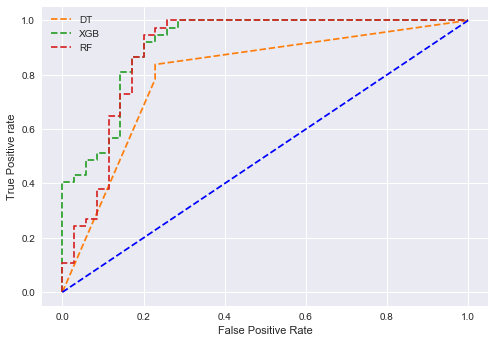

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='#ff7f0e', label='DT')
plt.plot(fpr2, tpr2, linestyle='--',color='#2ca02c', label='XGB')
plt.plot(fpr3, tpr3, linestyle='--',color='#d62728', label='RF')
#plt.plot(fpr4, tpr4, linestyle='--',color='#bcbd22', label='GBM')
#plt.plot(fpr5, tpr5, linestyle='--',color='#8c564b', label='SVM')
#plt.plot(fpr6, tpr6, linestyle='--',color='#1f77b4', label='LGBM')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();